# Review an algorithm using jupyter lab

In [116]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import os
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline     
sns.set(color_codes=True)

In [117]:
%pwd

'/home/shoff/Projekte/Automatically-Estimating-Task-Durations/Scripts'

In [118]:
df = pd.read_csv("./output/A004_SWE-Archiv-2020_SWE-Archiv-2020_.csv")
df['EstimationErrorInSeconds'] = df.apply (lambda row: row["EstimateInSeconds"] - row["DurationInSeconds"], axis=1)
df['DurationInHours'] = df.apply (lambda row: row["DurationInSeconds"]/60/60, axis=1)
df['DurationAsHour'] = df.apply (lambda row: round(row["DurationInSeconds"]/60/60,0), axis=1)
df['EstimationErrorInHours'] = df.apply (lambda row: (row["EstimateInSeconds"] - row["DurationInSeconds"])/60/60, axis=1)
df.tail(1)


,Name,Column,Color,Time spent,DurationInSeconds,EstimateInSeconds,EstimationErrorInSeconds,DurationInHours,DurationAsHour,EstimationErrorInHours
1022,IT-Service: Ticketsystem einrichten 28.12.2020...,12.202,White,0.575,2070.0,2431.655303,361.655303,0.575,1.0,0.10046


In [119]:
result = list()

for i in range(0,40):
    taskCount=len(df[df["DurationAsHour"]==i])
    mean = df[df["DurationAsHour"]==i]["EstimationErrorInHours"].mean()
    standard_deviation = df[df["DurationAsHour"]==i]["EstimationErrorInHours"].std()
    standard_deviation_minus = mean - standard_deviation
    standard_deviation_plus = mean + standard_deviation
    result.append(dict (
        task_duration_in_about_hours = i,
        taskCount = taskCount,
        mean = mean,
        standard_deviation = standard_deviation,
        standard_deviation_minus = standard_deviation_minus,
        standard_deviation_plus = standard_deviation_plus
    ))

error_distribution = pd.DataFrame(result)
error_distribution

,task_duration_in_about_hours,taskCount,mean,standard_deviation,standard_deviation_minus,standard_deviation_plus
0,0,592,0.946915,1.448336,-0.501421,2.395251
1,1,241,0.564019,1.264006,-0.699986,1.828025
2,2,64,0.451647,1.398671,-0.947025,1.850318
3,3,39,-0.296576,1.341479,-1.638054,1.044903
4,4,21,-0.656669,2.414340,-3.071008,1.757671
5,5,12,-0.675948,1.556078,-2.232025,0.880130
6,6,11,-2.572081,0.824439,-3.396520,-1.747642
7,7,5,-2.037891,1.587846,-3.625737,-0.450045
8,8,5,0.557462,4.157188,-3.599726,4.714650
9,9,2,-4.615215,0.355145,-4.970360,-4.260071


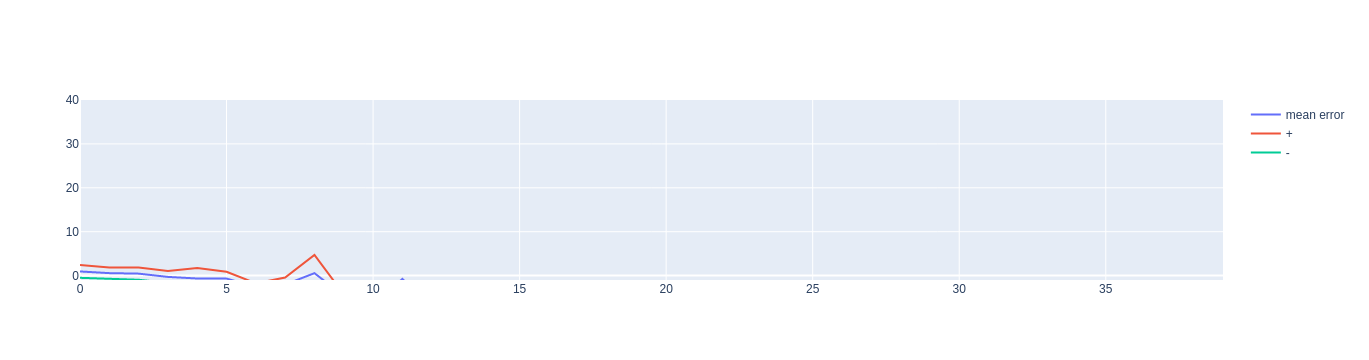

In [120]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["mean"], mode='lines',name='mean error'))
fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["standard_deviation_plus"], mode='lines',name='+'))
fig.add_trace(go.Scatter(x=error_distribution["task_duration_in_about_hours"], y=error_distribution["standard_deviation_minus"], mode='lines',name='-'))

fig.update(layout_yaxis_range = [-1,40])



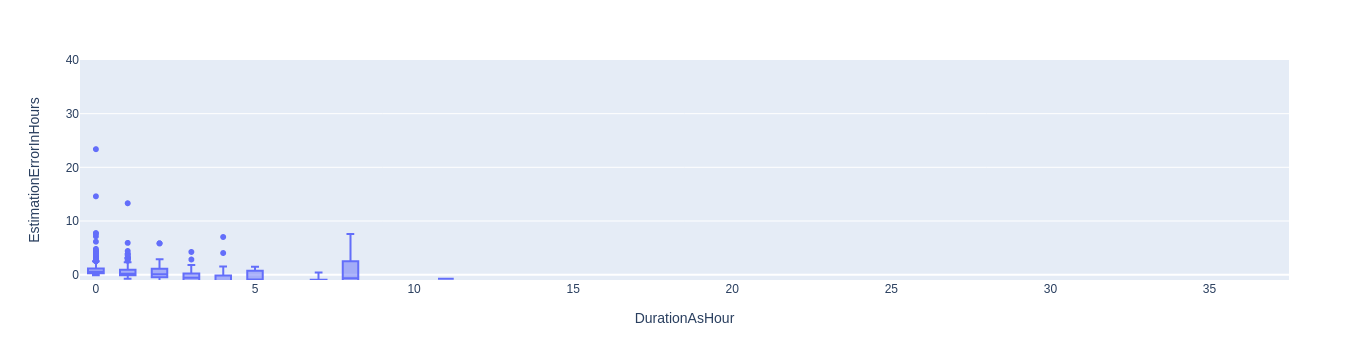

In [121]:
first_40_hours = df[df["DurationAsHour"]<41]

fig = px.box(first_40_hours, x="DurationAsHour", y="EstimationErrorInHours")
fig.update(layout_yaxis_range = [-1,40])

fig.show()

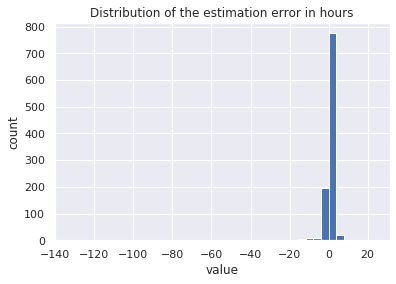

In [122]:
plt.hist(df["EstimationErrorInHours"], bins=40)
plt.title("Distribution of the estimation error in hours")
plt.xlabel("value")
plt.ylabel("count")
plt.show()
#plt

In [123]:
df2 = pd.read_csv("./output/A004_SWE-Archiv-2020_SWE-Archiv-2021_.csv")
df2['EstimationErrorInSeconds'] = df2.apply (lambda row: row["EstimateInSeconds"] - row["DurationInSeconds"], axis=1)
df2['EstimationErrorInHours'] = df2.apply (lambda row: row["EstimateInSeconds"]/60/60, axis=1)
df2.tail(1)


,Name,Column,Color,Time spent,DurationInSeconds,EstimateInSeconds,EstimationErrorInSeconds,EstimationErrorInHours
1256,Webseite: QA ausführen,8.2021,White,1.02,3672.0,1262.859842,-2409.140158,0.350794


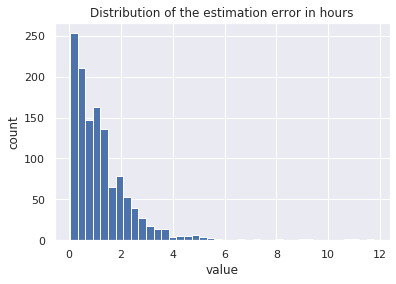

In [124]:
plt.hist(df2["EstimationErrorInHours"], bins=40)
plt.title("Distribution of the estimation error in hours")
plt.xlabel("value")
plt.ylabel("count")
plt.show()